In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# Stock Binomial Model Paramter Setting

In [2]:
s0 = 100
u  = 1+0.05
d  = 1-0.05 

r = 0.02
t = 1
n = 10

In [5]:
def binomial_stock(s0,n,u,d):
    """
    s0 : initial stock price
    n  : number of stock movement 
    u  : stock goes up for u percent 
    d  : stock drop for d percent 
    return --> pd.Dataframe of the stock price movement  
    """
    
    stock_movement_process = np.zeros((n+1,n+1))

    for i in range(n+1):
        for j in range(i+1):
            stock_movement_process[j,i] = s0*u**(i-j)*d**(j)
    
    stock_movement_process = pd.DataFrame(stock_movement_process)
    return stock_movement_process


Stock = pd.DataFrame(binomial_stock(s0,n,u,d))
Stock

,0,1,2,3,4,5,6,7,8,9,10
0,100.0,105.0,110.25,115.7625,121.550625,127.628156,134.009564,140.710042,147.745544,155.132822,162.889463
1,0.0,95.0,99.75,104.7375,109.974375,115.473094,121.246748,127.309086,133.674540,140.358267,147.376181
2,0.0,0.0,90.25,94.7625,99.500625,104.475656,109.699439,115.184411,120.943632,126.990813,133.340354
3,0.0,0.0,0.00,85.7375,90.024375,94.525594,99.251873,104.214467,109.425190,114.896450,120.641272
4,0.0,0.0,0.00,0.0000,81.450625,85.523156,89.799314,94.289280,99.003744,103.953931,109.151627
5,0.0,0.0,0.00,0.0000,0.000000,77.378094,81.246998,85.309348,89.574816,94.053557,98.756234
6,0.0,0.0,0.00,0.0000,0.000000,0.000000,73.509189,77.184649,81.043881,85.096075,89.350879
7,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,69.833730,73.325416,76.991687,80.841271
8,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,66.342043,69.659145,73.142103
9,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,63.024941,66.176188


# Plot the Binomial Process

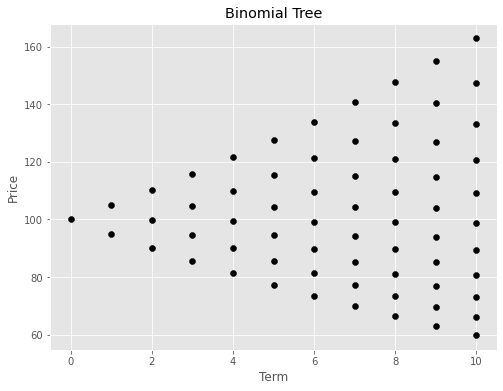

In [12]:
def Plot_Binomial_Process(Stock) :

    fig ,ax = plt.subplots(figsize=(8,6))

    ax.set_title('Binomial Tree')
    for i in range(Stock.shape[0]):
        for j in range(Stock.shape[1]):

            price = Stock.values[i,j]
            if price != 0:
                ax.scatter(j,price,color='black')

    ax.set_xlabel('Term')
    ax.set_ylabel("Price")
    plt.show()

Plot_Binomial_Process(Stock) 

# Transform Binomial Stock Process to Call Option Payoff

    - Let k = 100 (Assume 價平)

In [13]:
k = 100 
# 

def call_option_payoff(st,k):

    payoff = np.maximum(0,st-k) 

    return payoff 

def put_option_payoff(st,k):
    
    payoff = np.maximum(0,k-st) 

    return payoff 


def Call_Option_Binomial_Tree(Stock_Binomial_Process):

    Call_Payoff_Binomial = np.zeros((Stock_Binomial_Process.shape[0],Stock_Binomial_Process.shape[1]))

    for i in range(Stock_Binomial_Process.shape[1]):
        for j in range(Stock_Binomial_Process.shape[0]):

            st     = Stock_Binomial_Process.values[i,j]
            payoff = call_option_payoff(st,k)
            Call_Payoff_Binomial[i,j] = payoff

    return pd.DataFrame(Call_Payoff_Binomial)



Call_Option_Binomial_Process = Call_Option_Binomial_Tree(Stock_Binomial_Process=Stock)
Call_Option_Binomial_Process

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,5.0,10.25,15.7625,21.550625,27.628156,34.009564,40.710042,47.745544,55.132822,62.889463
1,0.0,0.0,0.00,4.7375,9.974375,15.473094,21.246748,27.309086,33.674540,40.358267,47.376181
2,0.0,0.0,0.00,0.0000,0.000000,4.475656,9.699439,15.184411,20.943632,26.990813,33.340354
3,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,4.214467,9.425190,14.896450,20.641272
4,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,3.953931,9.151627
5,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Discount for Appropreiate Call Option Values

In [14]:
def Price_Option(u,d,r,t,n,Call_Option_Binomial_Process):

    # by the binomial model
    p = ( np.exp(r*(t/n)) - d ) / (u-d)
    discount_rate = np.exp(-r*(t/n))


    Option_Value_Binomial = np.zeros((Call_Option_Binomial_Process.shape[0],Call_Option_Binomial_Process.shape[1]))

    for i in range(Call_Option_Binomial_Process.shape[1]-1,0,-1):
        for j in range(i):

            ct_up     = Call_Option_Binomial_Process.values[j,i]
            ct_down   = Call_Option_Binomial_Process.values[j+1,i]

            ct_1      =  discount_rate*(p*ct_up + (1-p)*ct_down )
            Option_Value_Binomial[j,i-1] = ct_1


    Option_Value = pd.DataFrame(Option_Value_Binomial)

    return Option_Value


Option_Value = Price_Option(u,d,r,t,n,Call_Option_Binomial_Process)
Option_Value

,0,1,2,3,4,5,6,7,8,9,10
0,2.594905,5.319555,10.449800,15.962300,21.750425,27.827956,34.209364,40.909842,47.945345,55.332622,0.0
1,0.000000,0.000000,2.458673,5.176511,10.174175,15.672894,21.446549,27.508886,33.874340,40.558067,0.0
2,0.000000,0.000000,0.000000,0.000000,2.322781,5.033825,9.899239,15.384211,21.143432,27.190613,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.187228,4.891495,9.624991,15.096250,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.052015,4.749521,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


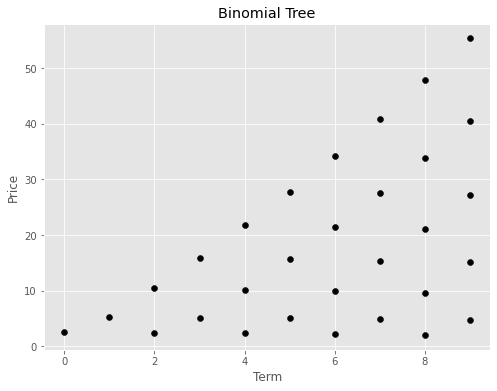

In [15]:
Plot_Binomial_Process(Option_Value) 

# JR Binomial Tree

    - Assume that u and d are define by the volatility

    - Parameters Settings
    

In [16]:
s0    = 100 
n     = 10
r     = 0.02
sigma = 0.2
q     = 0
t     = 1
k     = 100

In [19]:
def JR_Stock_Binomial_Tree(s0,n,t,sigma):

    u = np.exp(sigma*(t/n))
    d = 1/u 
    Stock_Binomial_Process = np.zeros((n+1,n+1))


    for i in range(n+1): # columns
        for j in range(i+1): # rows
            Stock_Binomial_Process[j,i] = s0*u**(i-j)*d**(j)
    
    return pd.DataFrame(Stock_Binomial_Process)

Stock = JR_Stock_Binomial_Tree(s0,n,t,sigma)
Stock

,0,1,2,3,4,5,6,7,8,9,10
0,100.0,102.020134,104.081077,106.183655,108.328707,110.517092,112.749685,115.027380,117.351087,119.721736,122.140276
1,0.0,98.019867,100.000000,102.020134,104.081077,106.183655,108.328707,110.517092,112.749685,115.027380,117.351087
2,0.0,0.000000,96.078944,98.019867,100.000000,102.020134,104.081077,106.183655,108.328707,110.517092,112.749685
3,0.0,0.000000,0.000000,94.176453,96.078944,98.019867,100.000000,102.020134,104.081077,106.183655,108.328707
4,0.0,0.000000,0.000000,0.000000,92.311635,94.176453,96.078944,98.019867,100.000000,102.020134,104.081077
5,0.0,0.000000,0.000000,0.000000,0.000000,90.483742,92.311635,94.176453,96.078944,98.019867,100.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,88.692044,90.483742,92.311635,94.176453,96.078944
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.935824,88.692044,90.483742,92.311635
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.214379,86.935824,88.692044
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.527021,85.214379


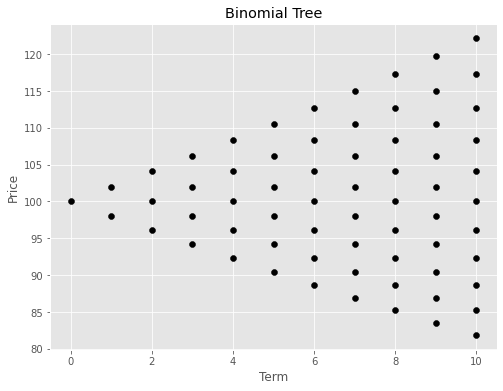

In [25]:
Plot_Binomial_Process(Stock) 

# We use the function that we built earier

In [26]:
def call_option_payoff(st,k):

    payoff = np.maximum(0,st-k) 

    return payoff 

def put_option_payoff(st,k):
    
    payoff = np.maximum(0,k-st) 

    return payoff 


def Call_Option_Binomial_Tree(Stock_Binomial_Process):

    Call_Payoff_Binomial = np.zeros((Stock_Binomial_Process.shape[0],Stock_Binomial_Process.shape[1]))

    for i in range(Stock_Binomial_Process.shape[1]):
        for j in range(Stock_Binomial_Process.shape[0]):

            st     = Stock_Binomial_Process.values[i,j]
            payoff = call_option_payoff(st,k)
            Call_Payoff_Binomial[i,j] = payoff

    return pd.DataFrame(np.round(Call_Payoff_Binomial,decimals=4))



Call_Option_Binomial_Process = Call_Option_Binomial_Tree(Stock_Binomial_Process=Stock)
Call_Option_Binomial_Process

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,2.0201,4.0811,6.1837,8.3287,10.5171,12.7497,15.0274,17.3511,19.7217,22.1403
1,0.0,0.0000,0.0000,2.0201,4.0811,6.1837,8.3287,10.5171,12.7497,15.0274,17.3511
2,0.0,0.0000,0.0000,0.0000,0.0000,2.0201,4.0811,6.1837,8.3287,10.5171,12.7497
3,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0201,4.0811,6.1837,8.3287
4,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0201,4.0811
5,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


# JR Binomial Model Price Option

In [27]:
def Price_Option(sigma,r,t,n,Call_Option_Binomial_Process):

    # by the binomial model parameters assumption
    u = np.exp(sigma*(t/n))
    d = 1/u 
    p = ( np.exp(r*(t/n)) - d ) / (u-d)
    discount_rate = np.exp(-r*(t/n))


    Option_Value_Binomial = np.zeros((Call_Option_Binomial_Process.shape[0],Call_Option_Binomial_Process.shape[1]))

    for i in range(Call_Option_Binomial_Process.shape[1]-1,0,-1): # columns
        for j in range(i):                                        # rows

            ct_up     = Call_Option_Binomial_Process.values[j,i]
            ct_down   = Call_Option_Binomial_Process.values[j+1,i]

            ct_1      =  discount_rate*(p*ct_up + (1-p)*ct_down )
            Option_Value_Binomial[j,i-1] = ct_1


    Option_Value = pd.DataFrame(Option_Value_Binomial)

    return Option_Value


Price_Option(sigma,r,t,n,Call_Option_Binomial_Process)

,0,1,2,3,4,5,6,7,8,9,10
0,1.098849,2.219946,4.280887,6.383461,8.528532,10.716897,12.949500,15.227194,17.550877,19.921555,0.0
1,0.000000,0.000000,1.098849,2.219946,4.280887,6.383461,8.528532,10.716897,12.949500,15.227194,0.0
2,0.000000,0.000000,0.000000,0.000000,1.098849,2.219946,4.280887,6.383461,8.528532,10.716897,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098849,2.219946,4.280887,6.383461,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098849,2.219946,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
